In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.models import Model

In [41]:
from tensorflow.keras.layers import Input,Flatten,Dense

In [6]:
from tensorflow.keras.datasets import cifar10

In [12]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [16]:
cols=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
X_test.shape

(10000, 32, 32, 3)

array([[[ 82,  22,  29],
        [ 88,  24,  32],
        [ 94,  23,  33],
        ...,
        [112, 119, 131],
        [110, 120, 133],
        [117, 129, 145]],

       [[ 90,  55,  53],
        [ 91,  40,  43],
        [ 91,  26,  34],
        ...,
        [ 82,  86,  98],
        [ 69,  76,  88],
        [ 78,  88, 102]],

       [[ 91,  72,  65],
        [ 91,  69,  63],
        [ 93,  68,  63],
        ...,
        [ 68,  69,  80],
        [ 62,  65,  77],
        [ 66,  71,  85]],

       ...,

       [[ 95,  81,  72],
        [ 80,  70,  68],
        [ 85,  79,  82],
        ...,
        [ 90,  87,  91],
        [ 84,  82,  87],
        [ 85,  83,  92]],

       [[ 83,  71,  68],
        [ 89,  82,  86],
        [101,  99, 110],
        ...,
        [104,  95, 104],
        [ 99,  93, 103],
        [ 96,  93, 105]],

       [[ 79,  68,  72],
        [ 83,  76,  85],
        [ 91,  88, 103],
        ...,
        [100,  93, 103],
        [ 99,  95, 106],
        [ 99,  97, 110]]], dtype=uint8)
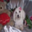

In [10]:
X_train[3499]

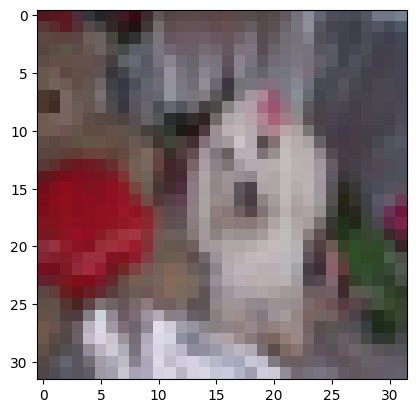

In [11]:
plt.imshow(X_train[3499])

In [15]:
y_train[3499]

array([5], dtype=uint8)

In [17]:
cols[5]

'dog'

In [18]:
X_train.max()

255

In [19]:
X_test.max()

255

In [20]:
display(X_test.min())
display(X_train.min())

0

0

array([[[136, 125, 133],
        [134, 122, 130],
        [137, 127, 133],
        ...,
        [139, 128, 131],
        [135, 124, 128],
        [127, 118, 121]],

       [[136, 125, 133],
        [132, 120, 128],
        [120, 110, 114],
        ...,
        [133, 120, 123],
        [125, 114, 120],
        [126, 116, 119]],

       [[130, 120, 126],
        [121, 112, 119],
        [ 91,  83,  86],
        ...,
        [132, 119, 123],
        [127, 116, 121],
        [133, 121, 124]],

       ...,

       [[ 92,  58,  37],
        [ 85,  54,  33],
        [ 97,  67,  46],
        ...,
        [231, 239, 246],
        [231, 239, 246],
        [224, 233, 240]],

       [[ 93,  59,  38],
        [ 93,  57,  33],
        [100,  67,  44],
        ...,
        [230, 238, 245],
        [231, 240, 247],
        [227, 236, 245]],

       [[ 91,  58,  37],
        [ 91,  54,  32],
        [100,  61,  37],
        ...,
        [228, 235, 242],
        [227, 236, 243],
        [223, 232, 241]]], dtype=uint8)
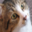

In [21]:
X_test[8700]

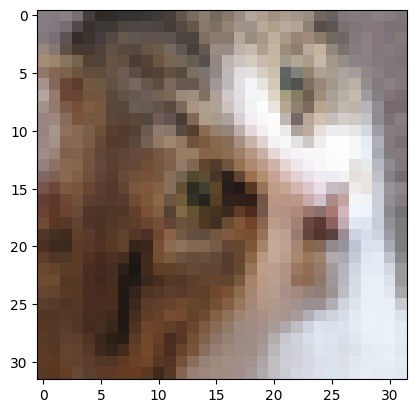

In [22]:
plt.imshow(X_test[8700])

In [23]:
y_test[8700]

array([3], dtype=uint8)

In [24]:
cols[3]

'cat'

array([[[172, 187, 130],
        [171, 186, 130],
        [168, 182, 126],
        ...,
        [158, 170, 113],
        [156, 169, 113],
        [147, 163, 107]],

       [[169, 185, 123],
        [168, 183, 122],
        [168, 184, 123],
        ...,
        [158, 175, 114],
        [152, 170, 110],
        [145, 165, 107]],

       [[174, 190, 126],
        [169, 185, 122],
        [170, 186, 123],
        ...,
        [157, 177, 115],
        [149, 170, 108],
        [146, 168, 109]],

       ...,

       [[150, 163, 100],
        [157, 168, 103],
        [162, 170, 104],
        ...,
        [158, 168, 108],
        [147, 160,  99],
        [139, 154,  90]],

       [[143, 154,  89],
        [149, 158,  90],
        [155, 161,  96],
        ...,
        [148, 157,  99],
        [143, 153,  92],
        [140, 153,  88]],

       [[148, 158,  93],
        [146, 155,  89],
        [149, 157,  92],
        ...,
        [137, 143,  86],
        [134, 139,  80],
        [136, 143,  82]]], dtype=uint8)
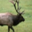

In [25]:
X_train[34]

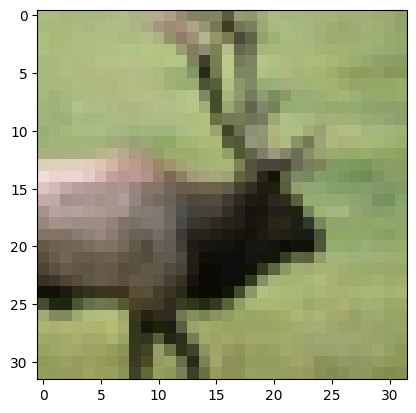

In [26]:
plt.imshow(X_train[34])

In [27]:
y_train[34]

array([4], dtype=uint8)

In [29]:
cols[4]

'deer'

In [31]:
X_train_scale=X_train/255


In [32]:
X_test_scale=X_test/255

In [33]:
X_train_scale.max()

1.0

In [34]:
X_test_scale.max()

1.0

In [45]:
feed=Input(shape=(32,32,3))

In [46]:
f1=Flatten()(feed)

In [47]:
d1=Dense(512,activation="relu")(f1)

In [49]:
d2=Dense(256,activation="relu")(d1)

In [51]:
d3=Dense(128,activation="relu")(d2)

In [53]:
d4=Dense(64,activation="relu")(d3)

In [54]:
d5=Dense(128,activation="relu")(d4)

In [55]:
d6=Dense(256,activation="relu")(d5)

In [56]:
ot=Dense(10,activation="softmax")(d6)

In [58]:
fmodel=Model(inputs=feed,outputs=ot)

In [59]:
fmodel.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,789,770 (6.83 MB)

 Trainable params: 1,789,770 (6.83 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
fmodel.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [64]:
fmodel.fit(X_train_scale,y_train,epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.2419 - loss: 2.0223
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.3606 - loss: 1.7727
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 26ms/step - accuracy: 0.3937 - loss: 1.6790
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.4220 - loss: 1.6115
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.4353 - loss: 1.5710
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.4497 - loss: 1.5306
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4624 - loss: 1.4986
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.4684 - loss: 1.4775
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.4791 - loss: 1.4614
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.4855 - loss: 1.4385
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.4896 - loss: 1.4145
Epoch 12

In [65]:
fmodel.evaluate(X_test_scale,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4864 - loss: 1.4560


[1.4674475193023682, 0.48260000348091125]

In [66]:
fmodel.predict(X_train_scale[23789])

ValueError: Input 0 of layer "functional" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(32, 32, 3)

In [67]:
X_train_scale[23789].shape

(32, 32, 3)

In [81]:
img2=X_train_scale[23783].reshape(1,32,32,3)

In [71]:
X_train_scale[23789].ndim

In [70]:
X_train_scale[23783].ndim

3

In [82]:
a=fmodel.predict(img2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [83]:
fmodel.predict(img2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.0520102 , 0.03335916, 0.03121652, 0.23442847, 0.03776508,
        0.0783337 , 0.05512709, 0.04889701, 0.11479044, 0.31407234]],
      dtype=float32)

In [84]:
np.argmax(a)

9

In [76]:
cols[9]

'truck'

In [77]:
X_train_scale[23789]

array([[[0.79607843, 0.7254902 , 0.78823529],
        [0.79607843, 0.7254902 , 0.78823529],
        [0.8       , 0.72941176, 0.79215686],
        ...,
        [0.88627451, 0.89803922, 0.95686275],
        [0.88235294, 0.89411765, 0.94901961],
        [0.87843137, 0.89411765, 0.95294118]],

       [[0.80392157, 0.73333333, 0.79607843],
        [0.80784314, 0.7372549 , 0.8       ],
        [0.80392157, 0.73333333, 0.79607843],
        ...,
        [0.89803922, 0.91372549, 0.97254902],
        [0.89411765, 0.90588235, 0.96470588],
        [0.89019608, 0.90588235, 0.96470588]],

       [[0.79215686, 0.72156863, 0.78431373],
        [0.80392157, 0.73333333, 0.79607843],
        [0.8       , 0.72941176, 0.79215686],
        ...,
        [0.89411765, 0.90588235, 0.96470588],
        [0.89019608, 0.90196078, 0.96078431],
        [0.88627451, 0.90196078, 0.96078431]],

       ...,

       [[0.48235294, 0.41568627, 0.45490196],
        [0.4745098 , 0.40784314, 0.44705882],
        [0.47843137, 0

array([[[0.79607843, 0.7254902 , 0.78823529],
        [0.79607843, 0.7254902 , 0.78823529],
        [0.8       , 0.72941176, 0.79215686],
        ...,
        [0.88627451, 0.89803922, 0.95686275],
        [0.88235294, 0.89411765, 0.94901961],
        [0.87843137, 0.89411765, 0.95294118]],

       [[0.80392157, 0.73333333, 0.79607843],
        [0.80784314, 0.7372549 , 0.8       ],
        [0.80392157, 0.73333333, 0.79607843],
        ...,
        [0.89803922, 0.91372549, 0.97254902],
        [0.89411765, 0.90588235, 0.96470588],
        [0.89019608, 0.90588235, 0.96470588]],

       [[0.79215686, 0.72156863, 0.78431373],
        [0.80392157, 0.73333333, 0.79607843],
        [0.8       , 0.72941176, 0.79215686],
        ...,
        [0.89411765, 0.90588235, 0.96470588],
        [0.89019608, 0.90196078, 0.96078431],
        [0.88627451, 0.90196078, 0.96078431]],

       ...,

       [[0.48235294, 0.41568627, 0.45490196],
        [0.4745098 , 0.40784314, 0.44705882],
        [0.47843137, 0

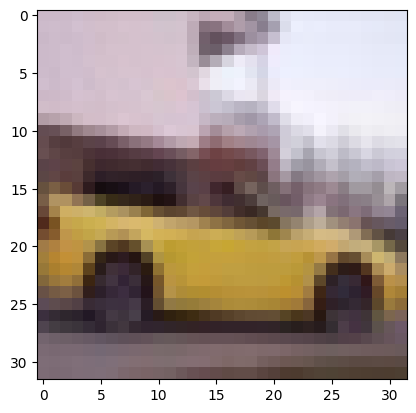

In [79]:
plt.imshow(X_train_scale[23789])